In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns 
import time

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Conv2D, BatchNormalization, MaxPool2D, GlobalMaxPool2D, Dropout #CNN
from keras.layers import GRU, LSTM, TimeDistributed #RNN
from tensorflow.keras.models import Sequential

In [3]:
df = pd.read_csv("training.csv")
df_copy = df.copy()
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,alphabet
0,255,255,255,255,254,253,252,253,254,252,...,253,254,254,253,254,255,255,255,255,alphabet_01_saa
1,254,246,212,148,95,83,95,114,129,140,...,155,67,25,66,157,230,251,253,254,alphabet_01_saa
2,254,248,217,153,99,85,98,119,136,147,...,189,98,31,39,122,211,248,253,254,alphabet_01_saa
3,255,251,223,160,104,91,106,129,147,158,...,202,109,30,33,122,216,249,253,254,alphabet_01_saa
4,253,245,218,173,141,137,151,166,176,181,...,223,150,67,39,100,190,243,252,253,alphabet_01_saa


In [4]:
label_encoder = LabelEncoder()
df_copy['alphabet'] = label_encoder.fit_transform(df_copy['alphabet'])

In [5]:
def visualize(df, digit_num, visualize=False, is_test=False):
    raw_data = df.loc[digit_num,]
    
    if is_test == False:
        label = raw_data.iloc[-1]  # Extract label from the last column
        filtered_image = raw_data.iloc[:-1]  # Exclude the last column (label)
    else:
        filtered_image = raw_data
    
    reshaped_image = filtered_image.values.reshape((32, 32))
    reshaped_image = reshaped_image.astype(float)
    
    if visualize == True:
        plt.imshow(reshaped_image, cmap='gray')
        if is_test == False:
            # Map the encoded label back to the original label
            original_label = label_encoder.inverse_transform([label])[0]
            plt.title(f'Label: {original_label}')
        plt.show()
    else:
        return reshaped_image, label


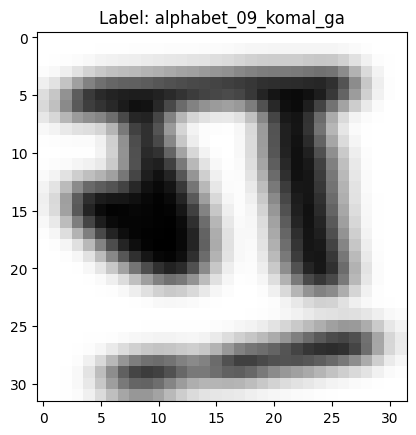

In [6]:
visualize(df_copy,16057,visualize=True)

In [7]:
print(df['alphabet'].unique())
print(len(df['alphabet'].unique()))

['alphabet_01_saa' 'alphabet_02_re' 'alphabet_03_ga' 'alphabet_04_ma'
 'alphabet_05_pa' 'alphabet_06_dha' 'alphabet_07_ni'
 'alphabet_08_komal_re' 'alphabet_09_komal_ga' 'alphabet_10_komal_dha'
 'alphabet_11_komal_ni' 'alphabet_12_tivra_ma' 'alphabet_13_saa_up'
 'alphabet_14_re_up' 'alphabet_15_ga_up' 'alphabet_16_ma_up'
 'alphabet_17_pa_up' 'alphabet_18_dha_up' 'alphabet_19_komal_re_up'
 'alphabet_20_komal_ga_up' 'alphabet_21_tivra_ma_up' 'alphabet_22_ma_low'
 'alphabet_23_tivra_ma_low' 'alphabet_24_pa_low'
 'alphabet_25_komal_dha_low' 'alphabet_26_dha_low'
 'alphabet_27_komal_ni_low' 'alphabet_28_ni_low' 'dash' 'four' 'khali'
 'sum' 'three' 'two' 'vibhaag']
35


In [8]:
df_train, df_test = train_test_split(df,test_size = 0.2)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [9]:
X_train = df_train.drop('alphabet', axis = 1)
X_test = df_test.drop('alphabet', axis = 1)
y_train = df_train['alphabet']
y_test = df_test['alphabet']

In [10]:
print(X_train.shape)
print(X_test.shape)

(56000, 1024)
(14000, 1024)


In [11]:
X_train = X_train.values.reshape(X_train.values.shape[0],32,32)
X_test = X_test.values.reshape(X_test.values.shape[0],32,32)

In [12]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], X_test.shape[2],1)

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [13]:
momentum = 0.92
model = Sequential()
model.add(Conv2D(64,(3,3), input_shape=(32,32,1),padding = 'same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization(momentum=momentum))
model.add(layers.MaxPool2D())
model.add(Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization(momentum=momentum))
model.add(layers.MaxPool2D())
model.add(Dropout(0.25))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization(momentum=momentum))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization(momentum=momentum))

model.add(tf.keras.layers.Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 46)             │        11,822 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,797,294 (25.93 MB)

 Trainable params: 6,795,374 (25.92 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
t1 = time.time()
history = model.fit(X_train, y_train, epochs = 10, validation_split=0.2, batch_size = 400)
t2 = time.time()

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 101s 880ms/step - accuracy: 0.4512 - loss: 2.2190 - val_accuracy: 0.9992 - val_loss: 0.0053
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.9955 - loss: 0.0165 - val_accuracy: 0.9996 - val_loss: 0.0014
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.9988 - loss: 0.0053 - val_accuracy: 0.9998 - val_loss: 3.0539e-04
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.9981 - loss: 0.0075 - val_accuracy: 0.9996 - val_loss: 0.0011
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.9978 - loss: 0.0096 - val_accuracy: 0.9983 - val_loss: 0.0041
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.9993 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 2.5777e-05
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9987 - val_loss: 0.0032
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9992 - loss: 0.0030

In [17]:
print("Training time for the CNN Recognizer:", t2-t1, "secs")

Training time for the CNN Recognizer: 1972.4452843666077 secs


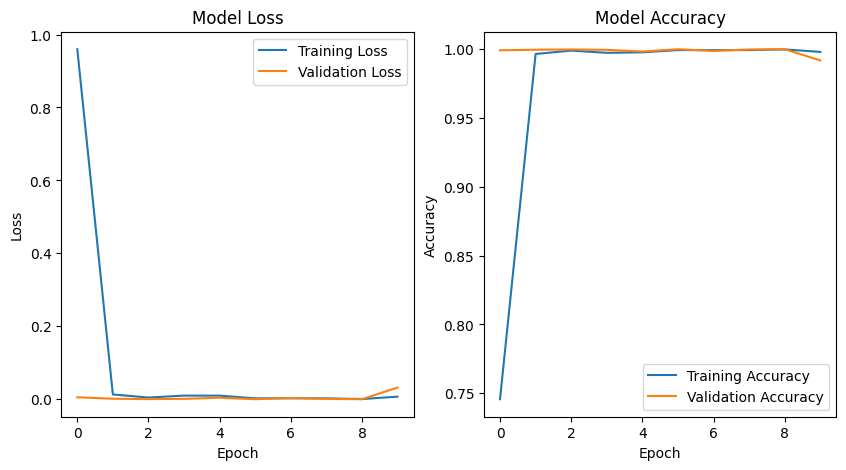

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy*100} %')

438/438 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.9921 - loss: 0.0367
Test Loss: 0.030826129019260406
Test Accuracy: 99.29999709129333 %


In [20]:
model.save('music_model.h5')

In [21]:
df_test_copy = df_test.copy()

In [22]:
df_test_copy['alphabet'] = label_encoder.fit_transform(df_test_copy['alphabet'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Predicted Class: 27
Predicted Character: alphabet_28_ni_low


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


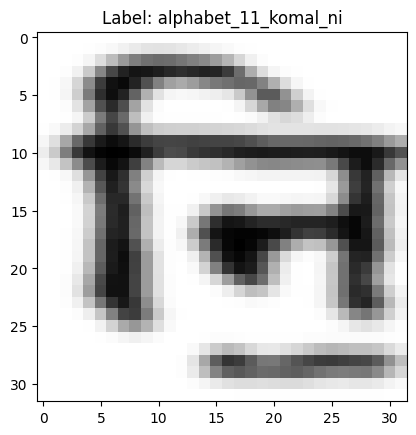

In [23]:
nummmmmmm = 1600
input_data = X_test[nummmmmmm]  
input_data = np.expand_dims(input_data, axis=0) 
pred = model.predict(input_data)
predicted_class = np.argmax(pred, axis=1)
print(f'Predicted Class: {predicted_class[0]}')
predicted_character = label_encoder.inverse_transform([predicted_class])[0]
print(f'Predicted Character: {predicted_character}')
visualize(df_test_copy,nummmmmmm,visualize=True)